# Oasis InfoByte Data Science Internship - Task 5

## Samarth Pandey

## SALES PREDICTION USING PYTHON
### Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

## Importing Dataset

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Cleaning Dataset

In [3]:
df=df.drop(columns=['Unnamed: 0'])
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## Data Transformation

In [4]:
df['TV']=df['TV'].astype('int')
df['Radio']=df['Radio'].astype('int')
df['Newspaper']=df['Newspaper'].astype('int')
df['Sales']=df['Sales'].astype('int')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230,37,69,22
1,44,39,45,10
2,17,45,69,9
3,151,41,58,18
4,180,10,58,12
5,8,48,75,7
6,57,32,23,11
7,120,19,11,13
8,8,2,1,4
9,199,2,21,10


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## EDA

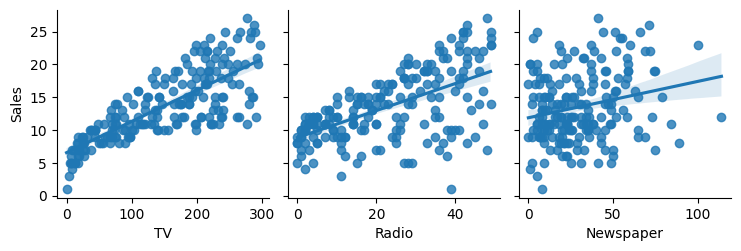

In [6]:
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

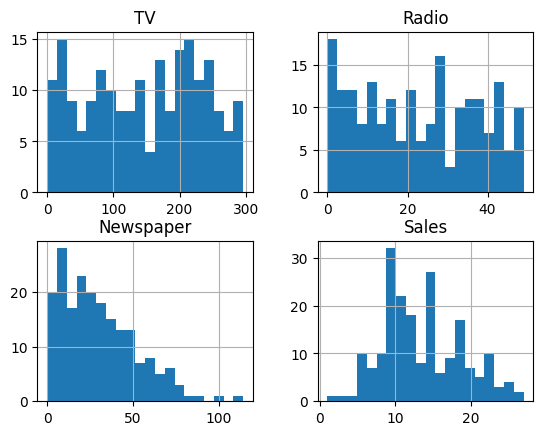

In [7]:
df.hist(bins=20)

<Axes: xlabel='Sales', ylabel='Density'>

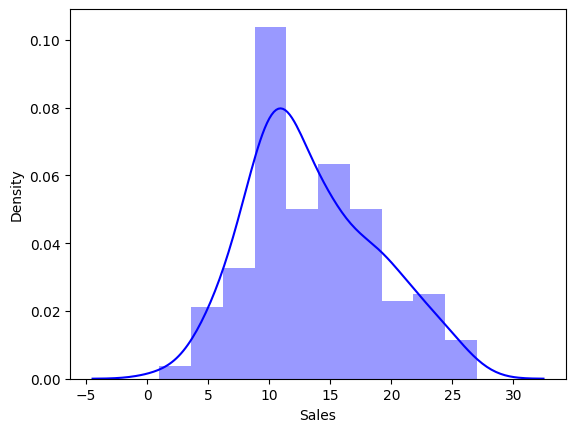

In [8]:
sns.distplot(df.Sales,bins=10,color="blue",hist=True)

In [9]:
num_cols = df[["TV","Radio","Newspaper"]]
a = df.corr()['Sales'].sort_values(ascending=False)
print(a)

Sales        1.000000
TV           0.778044
Radio        0.579960
Newspaper    0.229429
Name: Sales, dtype: float64


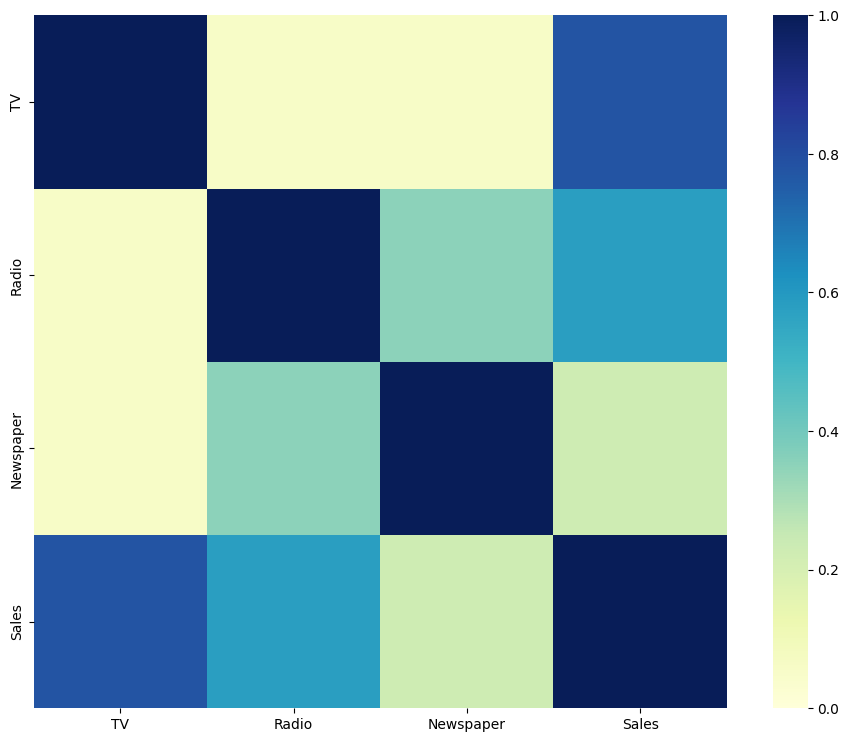

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = 0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show()

## Train Test Split

In [11]:
X=df.iloc[: , :-1]
Y=df.iloc[: , -1]

In [12]:
X.head()

,TV,Radio,Newspaper
0,230,37,69
1,44,39,45
2,17,45,69
3,151,41,58
4,180,10,58


In [13]:
Y.head()

0    22
1    10
2     9
3    18
4    12
Name: Sales, dtype: int32

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X , Y , test_size=0.3 , random_state=101)

In [15]:
X_train.head()

,TV,Radio,Newspaper
85,193,18,65
183,287,43,71
127,80,0,9
53,182,46,58
100,222,4,49


In [16]:
X_test.head()

,TV,Radio,Newspaper
37,74,49,45
109,255,26,5
31,112,17,38
89,109,47,51
66,31,24,2


In [17]:
Y_train.head()

85     15
183    26
127     8
53     21
100    11
Name: Sales, dtype: int32

In [18]:
Y_test.head()

37     14
109    19
31     11
89     16
66      9
Name: Sales, dtype: int32

## ML Algorithm : XGBRegressor

In [19]:
from xgboost import XGBRegressor
model=XGBRegressor()

## Model Training 

In [20]:
model.fit(X_train  , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Make Predictions

In [21]:
pred=model.predict(X_test)

## Accuracy Report

In [22]:
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
mae=mean_absolute_error(Y_test , pred)
mse=mean_squared_error(Y_test , pred)
r2=r2_score(Y_test , pred)

print("Mean absolute error: {}".format(mae))
print("Mean squared error: {}".format(mse))

print("r2 score: {}".format(r2))

Mean absolute error: 0.7314863363901775
Mean squared error: 0.9203614317992332
r2 score: 0.9677854259610773


## Building a Model to Predict Sales

In [23]:
tv=float(input("Cost of TV : "))
radio=float(input("Cost of Radio : "))
newspaper=float(input("Cost of newspaper : "))

arr=[tv , radio , newspaper]
arr=np.array(arr)
arr=arr.reshape(1 , -1)

result=model.predict(arr)
print("Sales : {}".format(result))

Cost of TV : 240
Cost of Radio : 38
Cost of newspaper : 22
Sales : [21.043352]
